## Mini Project

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Using SIFT for detecting and mapping points

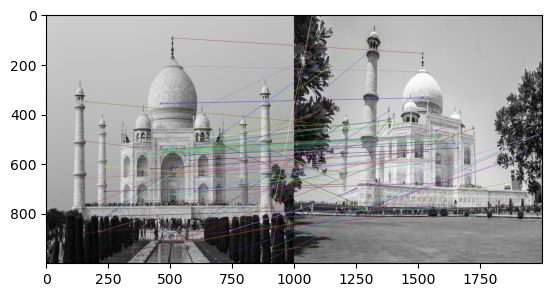

True

In [20]:
img1 = cv2.imread('tajMahal.jpg', cv2.IMREAD_GRAYSCALE)
img1 = cv2.resize(img1, (1000, 1000))
img2 = cv2.imread('tajMahal2.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.resize(img2, (1000, 1000))


sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k = 2)

good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)
        

result = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags = 2)
plt.imshow(result)
plt.show()
cv2.imwrite('matches_taj.png', result)

## Shi Thomas 

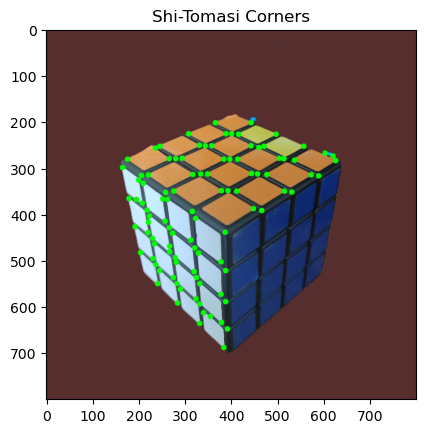

True

In [23]:
img = cv2.imread('Cube.jpg')  
img = cv2.resize(img, (800, 800)) 

if img is None:
    raise ValueError("Image not found. Check the path!")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray, maxCorners=100, qualityLevel=0.01, minDistance=10)

if corners is not None:
    corners = np.intp(corners)
    for corner in corners:
        x, y = corner.ravel()
        cv2.circle(img, (x, y), 6, (0, 255, 0), -1)
else:
    print("No corners found in the image.")

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Shi-Tomasi Corners')
plt.show()
cv2.imwrite('shi_thomas_cube.png', img)


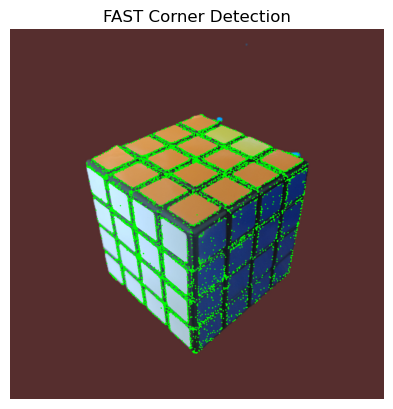

True

In [24]:
img = cv2.imread('Cube.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Initialize FAST detector
fast = cv2.FastFeatureDetector_create()

# Detect corners
kp = fast.detect(gray, None)

# Draw corners on the image
for corner in kp:
    x, y = corner.pt
    cv2.circle(img, (int(x), int(y)), 6, (0, 255, 0), -1)

# Display the image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('FAST Corner Detection')
plt.axis('off')
plt.show()
cv2.imwrite('fast_algo_cube.png', img)
